# (Exploring Ford's GoBike dataset)
## by (Abdelrahman Talaa)

## Investigation Overview

> To show few interesting trends i found in this dataset
## Dataset Overview

> Data contains a lot of information about the rides but most of the information is redundant and hard to use like coordinates of the start and the end of the ride can be used to calculate distance like this Δψ = ln( tan(π/4 + φ2/2) / tan(π/4 + φ1/2) ), and I just couldnt understand the formula

> So I made use of duration time of the ride, user type(customer/subscribes), gender , bike shares for all trip or not? and finally member birthyear

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.drop(['start_station_id','start_station_name','start_station_latitude'
                    ,'start_station_longitude', 'end_station_id','end_station_name',
                    'end_station_latitude','end_station_longitude','start_time','end_time','bike_id'],axis = 1)

## (Visualization 1)

> most of bike rides' duration spans from 100 seconds to 3000 seconds (notice that the xscale is logerthmic)

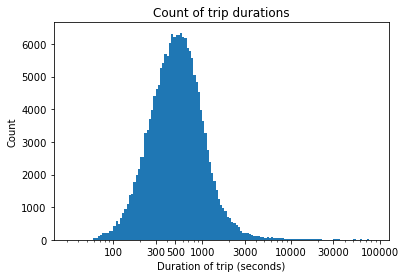

In [15]:
bins = 10**np.arange(1.5,np.log10(df_clean.duration_sec.max()),0.025)

plt.hist(data = df_clean, x= 'duration_sec', bins = bins);
plt.xscale('log')
plt.xlabel('Duration of trip (seconds)')
plt.xticks([100,300,500,1000,3000,10000,30000,100000],[100,300,500,1000,3000,10000,30000,100000]) 
plt.ylabel('Count');
plt.title('Count of trip durations')
plt.show()

## (Visualization 2)

> Customers use the service for more duration than subscribes and female users use it the most on both user types, but people with other genders tend to use it almost as much as female users when they are subscribes and the lowest as customers

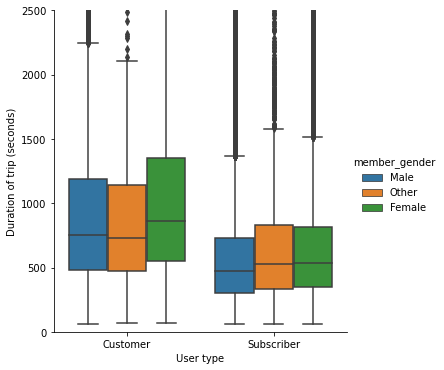

In [23]:
g = sb.catplot(x="user_type", y="duration_sec", hue="member_gender",
            kind="box", data=df_clean)
plt.ylim(0,2500)

plt.xlabel('User type')
plt.ylabel('Duration of trip (seconds)');

## (Visualization 3)
> it looks like most of the users are from the younger generation and users who use the app (notice that the scale is logerithmic)


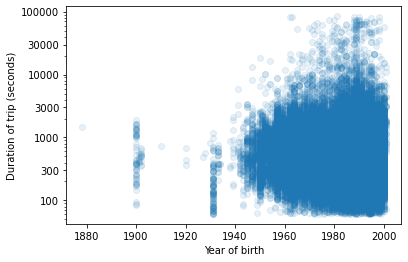

In [17]:
plt.scatter(data = df_clean, x = 'member_birth_year',y = 'duration_sec', alpha = 0.1)
plt.yscale('log')
plt.yticks([100,300,1000,3000,10000,30000,100000],[100,300,1000,3000,10000,30000,100000])

plt.xlabel('Year of birth')
plt.ylabel('Duration of trip (seconds)');

## (Visualization 4)
> other genders bike share for all trip the most and men the least.


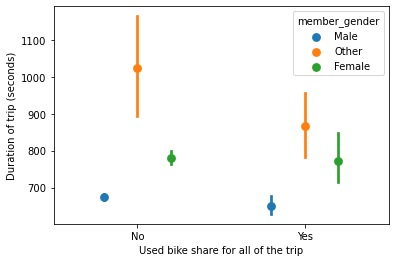

In [19]:
g = sb.pointplot(data = df_clean, x='bike_share_for_all_trip', y = 'duration_sec', hue = 'member_gender'
                 , linestyles = '', dodge = 0.4)

plt.xlabel('Used bike share for all of the trip')
plt.ylabel('Duration of trip (seconds)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle` #doesnt work

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [21]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

^C
